## summary

- 一种优化算法（optimizer），迭代算法
- gradient descent / gradient ascent：parameter learning （from data）
    - gradient descent：最小化目标（objective，loss，deep learning），沿着负梯度方向更新
        $$
        w=w-\eta\nabla_wJ(w)
        $$
    - gradient ascent：最大化目标（objective，reward），沿着正梯度方向更新
        $$
        w=w+\eta\nabla_wJ(w)
        $$
- 一些简单分析
    - $\eta\nabla_wJ(w)$：刻画着 update/diff/step
        - 由两两部分组成 
            - $\eta$：learning rate
            - $\nabla_wJ(w)$：gradient

## example 1: $f(x)=x^2$

In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [37]:
def gradient_descent(grad_fn, x0, learn_rate, n_iter=50, tolerance=1e-06, verbose=False):
    x = x0
    xs = [x0]
    for i in range(n_iter):
        diff = -learn_rate * grad_fn(x)
        if np.all(np.abs(diff) <= tolerance):
            break
        x += diff
        xs.append(x)
        if verbose:
            print(f'{i}: {xs[-2]:.3f}, {diff:.2f}={learn_rate:.3f}*{grad_fn(xs[-2]):.3f}, {xs[-1]:.3f}')
    return x, xs

def gradient_ascent(grad_fn, x0, learn_rate, n_iter=50, tolerance=1e-06, verbose=False):
    x = x0
    xs = [x0]
    for i in range(n_iter):
        diff = learn_rate * grad_fn(x)
        if np.all(np.abs(diff) <= tolerance):
            break
        x += diff
        xs.append(x)
        if verbose:
            print(f'{i}: {xs[-2]:.3f}, {diff:.2f}={learn_rate:.3f}*{grad_fn(xs[-2]):.3f}, {xs[-1]:.3f}')
    return x, xs

In [38]:
f = lambda x: x**2
grad_fn = lambda x: 2*x
x, xs = gradient_descent(grad_fn=grad_fn, x0=10.0, learn_rate=0.2, verbose=True)

0: 10.000, -4.00=0.200*20.000, 6.000
1: 6.000, -2.40=0.200*12.000, 3.600
2: 3.600, -1.44=0.200*7.200, 2.160
3: 2.160, -0.86=0.200*4.320, 1.296
4: 1.296, -0.52=0.200*2.592, 0.778
5: 0.778, -0.31=0.200*1.555, 0.467
6: 0.467, -0.19=0.200*0.933, 0.280
7: 0.280, -0.11=0.200*0.560, 0.168
8: 0.168, -0.07=0.200*0.336, 0.101
9: 0.101, -0.04=0.200*0.202, 0.060
10: 0.060, -0.02=0.200*0.121, 0.036
11: 0.036, -0.01=0.200*0.073, 0.022
12: 0.022, -0.01=0.200*0.044, 0.013
13: 0.013, -0.01=0.200*0.026, 0.008
14: 0.008, -0.00=0.200*0.016, 0.005
15: 0.005, -0.00=0.200*0.009, 0.003
16: 0.003, -0.00=0.200*0.006, 0.002
17: 0.002, -0.00=0.200*0.003, 0.001
18: 0.001, -0.00=0.200*0.002, 0.001
19: 0.001, -0.00=0.200*0.001, 0.000
20: 0.000, -0.00=0.200*0.001, 0.000
21: 0.000, -0.00=0.200*0.000, 0.000
22: 0.000, -0.00=0.200*0.000, 0.000
23: 0.000, -0.00=0.200*0.000, 0.000
24: 0.000, -0.00=0.200*0.000, 0.000
25: 0.000, -0.00=0.200*0.000, 0.000
26: 0.000, -0.00=0.200*0.000, 0.000
27: 0.000, -0.00=0.200*0.000, 0.000

Text(0, 0.5, 'f(x)')

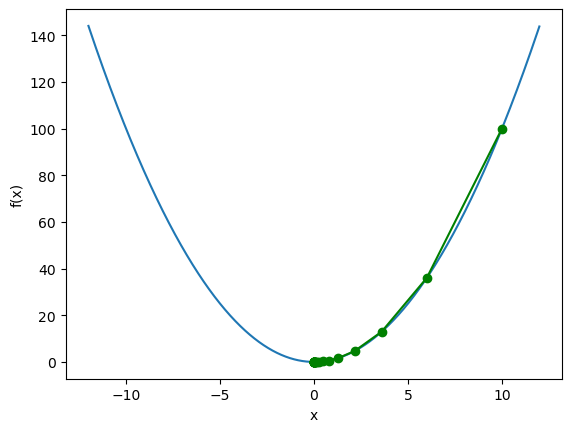

In [39]:
plt.plot(np.arange(-12, 12, 0.01), [f(x) for x in np.arange(-12, 12, 0.01)])
plt.plot(xs, [f(x) for x in xs], 'o-', color='g')
plt.xlabel('x')
plt.ylabel('f(x)')

- 可以看到，update/diff/step 其实越来越小
    $$\eta\cdot\nabla_wJ(w)$$
    - 如前所说，update/diff/step 由两部分组成，因为 learning rate（$\eta$） 是 fixed 的，因此 step/update/diff 的减少最要是 grad （$\nabla_wJ(w)$）的减少造成的；
    

Text(0, 0.5, 'f(x)')

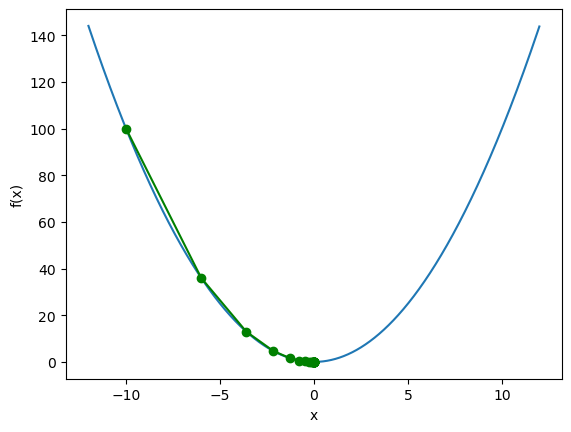

In [40]:
f = lambda x: x**2
grad_fn = lambda x: 2*x
x, xs = gradient_descent(grad_fn=grad_fn, x0=-10.0, learn_rate=0.2)
plt.plot(np.arange(-12, 12, 0.01), [f(x) for x in np.arange(-12, 12, 0.01)])
plt.plot(xs, [f(x) for x in xs], 'o-', color='g')
plt.xlabel('x')
plt.ylabel('f(x)')

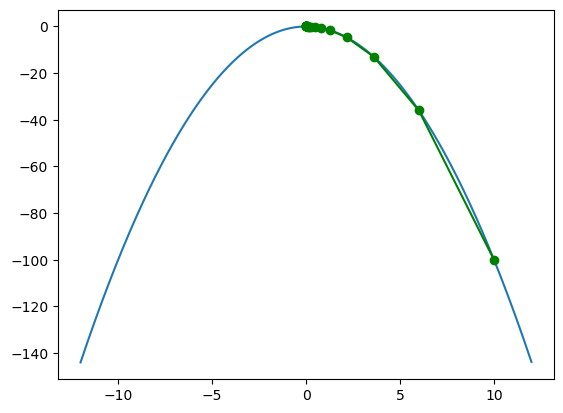

In [41]:
f = lambda x: -x**2
grad_fn = lambda x: -2*x
x, xs = gradient_ascent(grad_fn=grad_fn, x0=10.0, learn_rate=0.2)
plt.plot(np.arange(-12, 12, 0.01), [f(x) for x in np.arange(-12, 12, 0.01)])
plt.plot(xs, [f(x) for x in xs], 'o-', color='g')

## learning rate

0: 10.000, -16.00=0.800*20.000, -6.000
1: -6.000, 9.60=0.800*-12.000, 3.600
2: 3.600, -5.76=0.800*7.200, -2.160
3: -2.160, 3.46=0.800*-4.320, 1.296
4: 1.296, -2.07=0.800*2.592, -0.778
5: -0.778, 1.24=0.800*-1.555, 0.467
6: 0.467, -0.75=0.800*0.933, -0.280
7: -0.280, 0.45=0.800*-0.560, 0.168
8: 0.168, -0.27=0.800*0.336, -0.101
9: -0.101, 0.16=0.800*-0.202, 0.060
10: 0.060, -0.10=0.800*0.121, -0.036
11: -0.036, 0.06=0.800*-0.073, 0.022
12: 0.022, -0.03=0.800*0.044, -0.013
13: -0.013, 0.02=0.800*-0.026, 0.008
14: 0.008, -0.01=0.800*0.016, -0.005
15: -0.005, 0.01=0.800*-0.009, 0.003
16: 0.003, -0.00=0.800*0.006, -0.002
17: -0.002, 0.00=0.800*-0.003, 0.001
18: 0.001, -0.00=0.800*0.002, -0.001
19: -0.001, 0.00=0.800*-0.001, 0.000
20: 0.000, -0.00=0.800*0.001, -0.000
21: -0.000, 0.00=0.800*-0.000, 0.000
22: 0.000, -0.00=0.800*0.000, -0.000
23: -0.000, 0.00=0.800*-0.000, 0.000
24: 0.000, -0.00=0.800*0.000, -0.000
25: -0.000, 0.00=0.800*-0.000, 0.000
26: 0.000, -0.00=0.800*0.000, -0.000
27: -0.

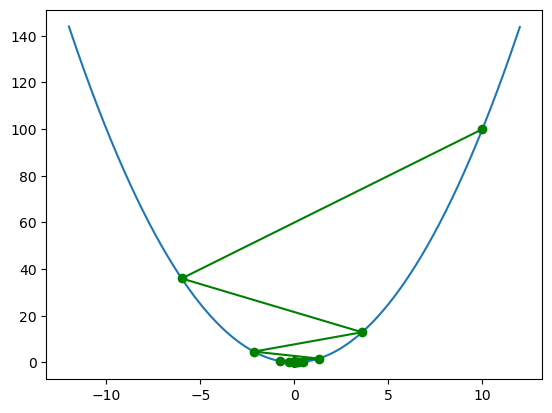

In [43]:
f = lambda x: x**2
grad_fn = lambda x: 2*x
x, xs = gradient_descent(grad_fn=grad_fn, x0=10.0, learn_rate=0.8, verbose=True)
plt.plot(np.arange(-12, 12, 0.01), [f(x) for x in np.arange(-12, 12, 0.01)])
plt.plot(xs, [f(x) for x in xs], 'o-', color='g')

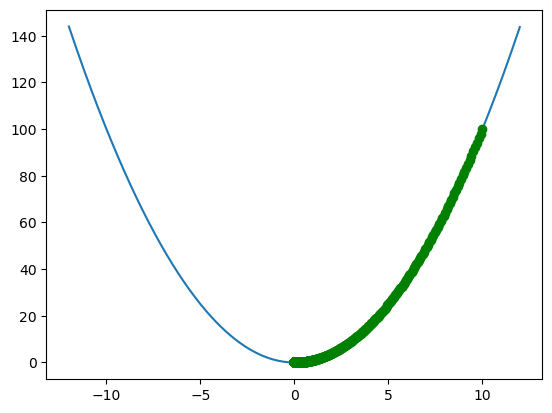

In [45]:
f = lambda x: x**2
grad_fn = lambda x: 2*x
x, xs = gradient_descent(grad_fn=grad_fn, x0=10.0, learn_rate=0.005, n_iter=2000)
plt.plot(np.arange(-12, 12, 0.01), [f(x) for x in np.arange(-12, 12, 0.01)])
plt.plot(xs, [f(x) for x in xs], 'o-', color='g')

## example 2: $f(x)=x^4-5x^2-3x$

In [46]:
f = lambda x: x**4-5*x**2-3*x
grad_fn = lambda x: 4*x**3-10*x-3

0: 0.000, 0.60=0.200*-3.000, 0.600
1: 0.600, 1.63=0.200*-8.136, 2.227
2: 2.227, -3.78=0.200*18.919, -1.557
3: -1.557, 0.50=0.200*-2.522, -1.052
4: -1.052, -0.57=0.200*2.862, -1.625
5: -1.625, 0.78=0.200*-3.907, -0.843
6: -0.843, -0.61=0.200*3.034, -1.450
7: -1.450, 0.14=0.200*-0.695, -1.311
8: -1.311, -0.22=0.200*1.097, -1.530
9: -1.530, 0.41=0.200*-2.033, -1.124
10: -1.124, -0.51=0.200*2.561, -1.636
11: -1.636, 0.83=0.200*-4.155, -0.805
12: -0.805, -0.59=0.200*2.964, -1.398
13: -1.398, -0.01=0.200*0.054, -1.409
14: -1.409, 0.02=0.200*-0.093, -1.390
15: -1.390, -0.03=0.200*0.158, -1.422
16: -1.422, 0.06=0.200*-0.276, -1.366
17: -1.366, -0.09=0.200*0.459, -1.458
18: -1.458, 0.16=0.200*-0.821, -1.294
19: -1.294, -0.25=0.200*1.273, -1.549
20: -1.549, 0.47=0.200*-2.370, -1.075
21: -1.075, -0.56=0.200*2.782, -1.631
22: -1.631, 0.81=0.200*-4.047, -0.822
23: -0.822, -0.60=0.200*2.998, -1.421
24: -1.421, 0.05=0.200*-0.271, -1.367
25: -1.367, -0.09=0.200*0.452, -1.457
26: -1.457, 0.16=0.200*-0.

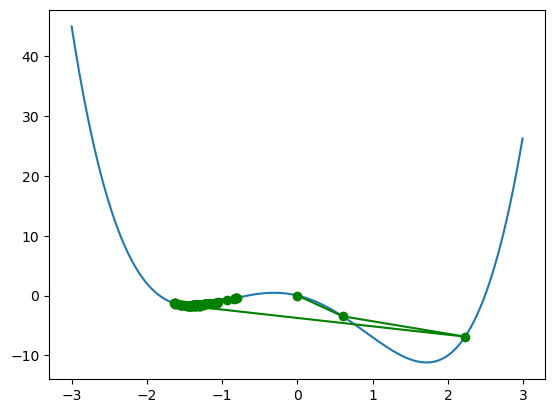

In [47]:
x, xs = gradient_descent(grad_fn=grad_fn, x0=0, learn_rate=0.2, verbose=True)
plt.plot(np.arange(-3, 3, 0.01), [f(x) for x in np.arange(-3, 3, 0.01)])
plt.plot(xs, [f(x) for x in xs], 'o-', color='g')

0: 0.000, 0.30=0.100*-3.000, 0.300
1: 0.300, 0.59=0.100*-5.892, 0.889
2: 0.889, 0.91=0.100*-9.080, 1.797
3: 1.797, -0.22=0.100*2.247, 1.573
4: 1.573, 0.32=0.100*-3.171, 1.890
5: 1.890, -0.51=0.100*5.092, 1.380
6: 1.380, 0.63=0.100*-6.283, 2.009
7: 2.009, -0.93=0.100*9.331, 1.076
8: 1.076, 0.88=0.100*-8.779, 1.953
9: 1.953, -0.73=0.100*7.282, 1.225
10: 1.225, 0.79=0.100*-7.895, 2.015
11: 2.015, -0.96=0.100*9.565, 1.058
12: 1.058, 0.88=0.100*-8.842, 1.942
13: 1.942, -0.69=0.100*6.891, 1.253
14: 1.253, 0.77=0.100*-7.658, 2.019
15: 2.019, -0.97=0.100*9.737, 1.045
16: 1.045, 0.89=0.100*-8.884, 1.934
17: 1.934, -0.66=0.100*6.591, 1.275
18: 1.275, 0.75=0.100*-7.461, 2.021
19: 2.021, -0.98=0.100*9.806, 1.040
20: 1.040, 0.89=0.100*-8.899, 1.930
21: 1.930, -0.65=0.100*6.467, 1.284
22: 1.284, 0.74=0.100*-7.376, 2.021
23: 2.021, -0.98=0.100*9.818, 1.039
24: 1.039, 0.89=0.100*-8.902, 1.930
25: 1.930, -0.64=0.100*6.444, 1.285
26: 1.285, 0.74=0.100*-7.361, 2.021
27: 2.021, -0.98=0.100*9.819, 1.039
28

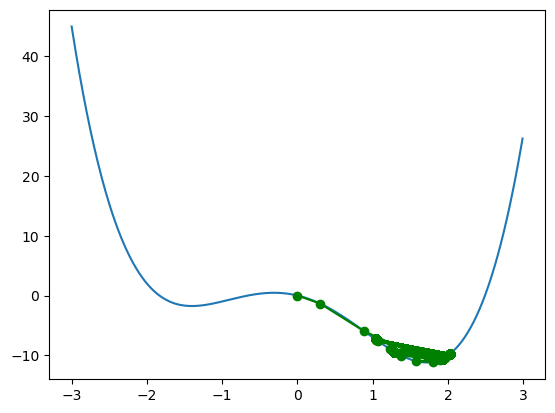

In [50]:
x, xs = gradient_descent(grad_fn=grad_fn, x0=0, learn_rate=0.1, verbose=True, n_iter=1000)
print(x)
plt.plot(np.arange(-3, 3, 0.01), [f(x) for x in np.arange(-3, 3, 0.01)])
plt.plot(xs, [f(x) for x in xs], 'o-', color='g')